In [108]:

import numpy as np
from matplotlib import pyplot as plt


In [109]:
import pandas as pd

In [110]:
# loading the csv file
df = pd.read_csv('/content/drive/Shareddrives/MATH 3439 - Spring 2023/data/free_throws.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [111]:
df = pd.read_csv('/content/drive/Shareddrives/MATH 3439 - Spring 2023/data/free_throws.csv')
df.head()

,player,season_start,period,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,...,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Aaron Brooks,2007,4,0,1,POR,HOU,83,95,86,...,51,5.2,1.1,1.7,-0.5,0.026,0.085,0.224,0.535,0.249
1,Aaron Brooks,2007,4,0,1,LAC,HOU,77,96,79,...,51,5.2,1.1,1.7,-0.5,0.026,0.085,0.224,0.535,0.249
2,Aaron Brooks,2007,3,0,1,HOU,NY,76,67,103,...,51,5.2,1.1,1.7,-0.5,0.026,0.085,0.224,0.535,0.249
3,Aaron Brooks,2007,4,0,1,POR,HOU,77,86,79,...,51,5.2,1.1,1.7,-0.5,0.026,0.085,0.224,0.535,0.249
4,Aaron Brooks,2007,2,0,1,HOU,NO,31,35,82,...,51,5.2,1.1,1.7,-0.5,0.026,0.085,0.224,0.535,0.249


In [112]:
df.isna().sum() # are there any missing values

player               0
season_start         0
period               0
playoffs             0
shot_made            0
home_team            0
visit_team           0
home_score           0
visit_score          0
home_final_score     0
visit_final_score    0
minutes              0
shot_count           0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
dtype: int64

In [113]:
# how many columns and rows
df.shape

(598151, 32)

In [114]:
df = df.drop(['gp', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'], axis=1 )

In [115]:
df = df.drop(['player_height', 'college', 'draft_round', 'draft_number', 'net_rating', 'player_weight'], axis=1)

In [116]:
# another way to list columns
df.columns

Index(['player', 'season_start', 'period', 'playoffs', 'shot_made',
       'home_team', 'visit_team', 'home_score', 'visit_score',
       'home_final_score', 'visit_final_score', 'minutes', 'shot_count',
       'team_abbreviation', 'age', 'country', 'draft_year', 'pts'],
      dtype='object')

In [117]:
len(df['player'].unique()) # how many players

1039

In [118]:
overall = df.groupby('season_start').agg({'shot_made' : ['sum', 'count']})

In [119]:
overall.reset_index()

season_start shot_made       
                     sum  count
0         2006     49582  65950
1         2007     47984  63544
2         2008     48705  63236
3         2009     47205  62172
4         2010     47174  61650
5         2011     35332  46922
6         2012     42537  56605
7         2013     46087  60864
8         2014     43333  57917
9         2015     44817  59291

In [120]:
overall.columns = ['made','total']

In [121]:
overall.reset_index()

,season_start,made,total
0,2006,49582,65950
1,2007,47984,63544
2,2008,48705,63236
3,2009,47205,62172
4,2010,47174,61650
5,2011,35332,46922
6,2012,42537,56605
7,2013,46087,60864
8,2014,43333,57917
9,2015,44817,59291


In [122]:
overall['%'] = overall['made'] / overall['total'] * 100

In [123]:
overall = overall.reset_index()

In [124]:
overall.columns

Index(['season_start', 'made', 'total', '%'], dtype='object')

In [125]:
overall.head(10)

,season_start,made,total,%
0,2006,49582,65950,75.181198
1,2007,47984,63544,75.513030
2,2008,48705,63236,77.021001
3,2009,47205,62172,75.926462
4,2010,47174,61650,76.519059
5,2011,35332,46922,75.299433
6,2012,42537,56605,75.147072
7,2013,46087,60864,75.721280
8,2014,43333,57917,74.819138
9,2015,44817,59291,75.588201


In [126]:
overall.columns

Index(['season_start', 'made', 'total', '%'], dtype='object')

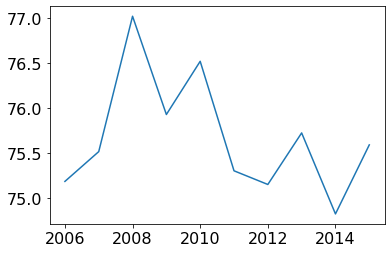

In [127]:
plt.plot(overall['season_start'], overall['%'])

In [128]:
df.head()

,player,season_start,period,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,shot_count,team_abbreviation,age,country,draft_year,pts
0,Aaron Brooks,2007,4,0,1,POR,HOU,83,95,86,95,0.933333,2,HOU,23,USA,2007,5.2
1,Aaron Brooks,2007,4,0,1,LAC,HOU,77,96,79,105,12.533333,1,HOU,23,USA,2007,5.2
2,Aaron Brooks,2007,3,0,1,HOU,NY,76,67,103,91,4.466667,1,HOU,23,USA,2007,5.2
3,Aaron Brooks,2007,4,0,1,POR,HOU,77,86,79,89,7.533333,2,HOU,23,USA,2007,5.2
4,Aaron Brooks,2007,2,0,1,HOU,NO,31,35,82,87,26.600000,1,HOU,23,USA,2007,5.2


In [129]:
lebron_df = df[(df['player'] == 'LeBron James') & (df['shot_count'])]
lebron_df

,player,season_start,period,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,shot_count,team_abbreviation,age,country,draft_year,pts
369139,LeBron James,2006,4,1,1,CLE,WSH,98,90,109,102,6.333333,1,CLE,22,USA,2003,27.3
369140,LeBron James,2006,4,0,0,CLE,LAL,74,77,99,90,21.600000,1,CLE,22,USA,2003,27.3
369142,LeBron James,2006,4,1,1,WSH,CLE,90,97,92,98,0.333333,1,CLE,22,USA,2003,27.3
369143,LeBron James,2006,2,0,0,CLE,PHI,36,36,108,95,17.600000,1,CLE,22,USA,2003,27.3
369144,LeBron James,2006,3,0,1,MIA,CLE,45,43,86,81,32.800000,1,CLE,22,USA,2003,27.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377131,LeBron James,2015,2,0,1,TOR,CLE,49,49,103,99,1.000000,3,CLE,31,USA,2003,25.3
377132,LeBron James,2015,1,0,1,CLE,SAC,20,14,120,100,19.733333,1,CLE,31,USA,2003,25.3
377133,LeBron James,2015,2,0,1,BOS,CLE,42,37,77,89,4.533333,1,CLE,31,USA,2003,25.3
377135,LeBron James,2015,1,0,0,CLE,IND,8,6,101,97,32.000000,1,CLE,31,USA,2003,25.3


In [130]:
player_shots_df = df.groupby('player').agg({'shot_made' : ['sum', 'count']})


In [131]:
# where are the top score players in the count of shot_made
#Steve Nash #Ray Allen #Chauncey Billups #Stephen Curry #Dirk Nowitzki

In [132]:
count_shot = df.groupby(['player', 'shot_count']).agg({'shot_made':['sum','count']})


In [133]:
count_shot.reset_index()

player shot_count shot_made      
                                          sum count
0           Aaron Brooks          1       503   613
1           Aaron Brooks          2       393   462
2           Aaron Brooks          3        32    34
3           Aaron Gordon          1        91   141
4           Aaron Gordon          2        81   112
...                  ...        ...       ...   ...
2494       Zaza Pachulia          2       719   940
2495        Zoran Dragic          1         2     3
2496        Zoran Dragic          2         1     2
2497  Zydrunas Ilgauskas          1       388   504
2498  Zydrunas Ilgauskas          2       324   398

[2499 rows x 4 columns]

In [134]:
count_shot.columns = ['made', 'total']
count_shot.reset_index()

,player,shot_count,made,total
0,Aaron Brooks,1,503,613
1,Aaron Brooks,2,393,462
2,Aaron Brooks,3,32,34
3,Aaron Gordon,1,91,141
4,Aaron Gordon,2,81,112
...,...,...,...,...
2494,Zaza Pachulia,2,719,940
2495,Zoran Dragic,1,2,3
2496,Zoran Dragic,2,1,2
2497,Zydrunas Ilgauskas,1,388,504


In [135]:
count_shot = count_shot.reset_index()

In [136]:
count_shot.head()

,player,shot_count,made,total
0,Aaron Brooks,1,503,613
1,Aaron Brooks,2,393,462
2,Aaron Brooks,3,32,34
3,Aaron Gordon,1,91,141
4,Aaron Gordon,2,81,112


In [137]:
count_shot['%'] = count_shot['made'] / count_shot['total'] * 100

In [138]:
count_shot.columns

Index(['player', 'shot_count', 'made', 'total', '%'], dtype='object')

In [139]:
count_shot.head()

,player,shot_count,made,total,%
0,Aaron Brooks,1,503,613,82.055465
1,Aaron Brooks,2,393,462,85.064935
2,Aaron Brooks,3,32,34,94.117647
3,Aaron Gordon,1,91,141,64.539007
4,Aaron Gordon,2,81,112,72.321429


Top shooters shot count

In [140]:
LeBron_count = count_shot[count_shot['player'] == 'LeBron James']

In [141]:
Kevin_count = count_shot[count_shot['player'] == 'Kevin Durant']

In [142]:
Kobe_count = count_shot[count_shot['player'] == 'Kobe Bryant']

In [143]:
Carmelo_count = count_shot[count_shot['player'] == 'Carmelo Anthony']

In [144]:
Dwight_count = count_shot[count_shot['player'] == 'Dwight Howard']

Top scorers shot count

In [145]:
#LeBron James #Kevin Durant #Kobe Bryant #Carmelo Anthony #Dwight Howard
#Steve Nash #Ray Allen # Chauncey Billups #Stephen Curry #Dirk Nowitzki

In [146]:
Nash_count = count_shot[count_shot['player'] == 'Steve Nash']
Nash_count

,player,shot_count,made,total,%
2224,Steve Nash,1,904,997,90.672016
2225,Steve Nash,2,536,580,92.413793
2226,Steve Nash,3,14,14,100.000000


In [147]:
Ray_count = count_shot[count_shot['player'] == 'Ray Allen']

In [148]:
Chauncey_count = count_shot[count_shot['player'] == 'Chauncey Billups']
Chauncey_count

,player,shot_count,made,total,%
377,Chauncey Billups,1,1403,1585,88.517350
378,Chauncey Billups,2,1069,1157,92.394123
379,Chauncey Billups,3,46,51,90.196078


In [149]:
Curry_count = count_shot[count_shot['player'] == 'Stephen Curry']

In [150]:
Dirk_count = count_shot[count_shot['player'] == 'Dirk Nowitzki']

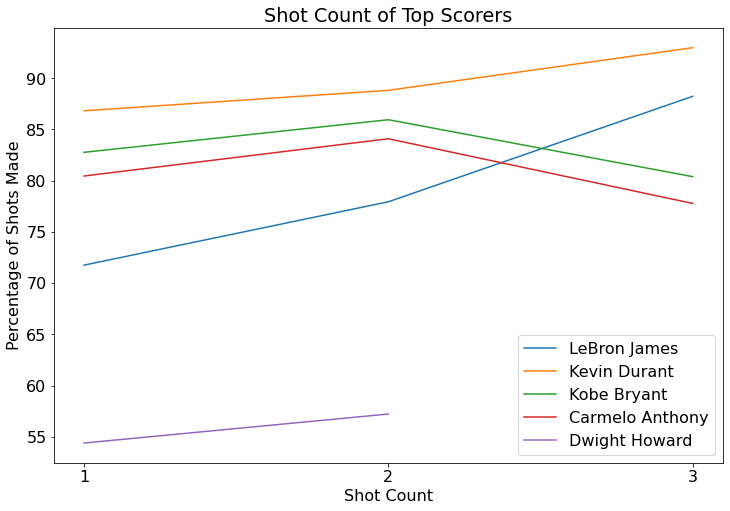

In [184]:
plt.figure(figsize=(12,8))
plt.plot(LeBron_count['shot_count'], LeBron_count['%'], label='LeBron James')
plt.plot(Kevin_count['shot_count'], Kevin_count['%'], label='Kevin Durant')
plt.plot(Kobe_count['shot_count'], Kobe_count['%'], label='Kobe Bryant')
plt.plot(Carmelo_count['shot_count'], Carmelo_count['%'], label='Carmelo Anthony')
plt.plot(Dwight_count['shot_count'], Dwight_count['%'], label='Dwight Howard')
plt.xlabel('Shot Count')
plt.ylabel('Percentage of Shots Made')
plt.legend(loc='lower right')
plt.title(label='Shot Count of Top Scorers')
plt.xticks(np.arange(1,4,1))
plt.show()

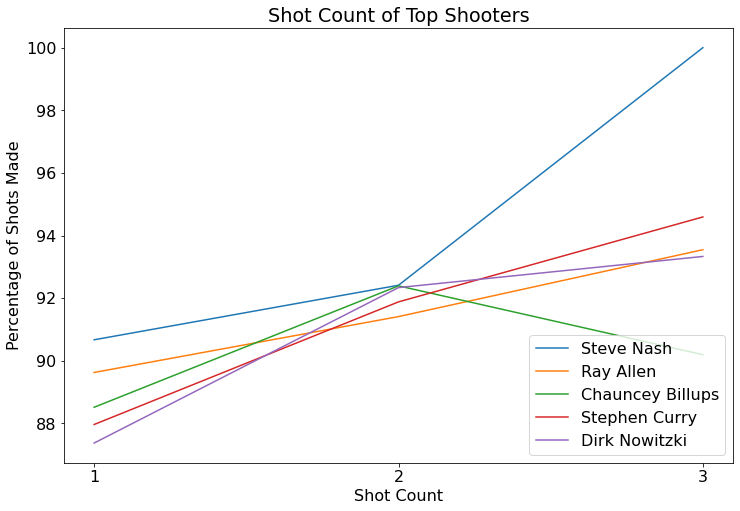

In [185]:
plt.figure(figsize=(12,8))
plt.plot(Nash_count['shot_count'], Nash_count['%'], label = 'Steve Nash')
plt.plot(Ray_count['shot_count'], Ray_count['%'], label = 'Ray Allen')
plt.plot(Chauncey_count['shot_count'], Chauncey_count['%'], label = 'Chauncey Billups')
plt.plot(Curry_count['shot_count'], Curry_count['%'], label = 'Stephen Curry')
plt.plot(Dirk_count['shot_count'], Dirk_count['%'], label = 'Dirk Nowitzki')
plt.xlabel('Shot Count')
plt.ylabel('Percentage of Shots Made')
plt.legend(loc='lower right')
plt.title('Shot Count of Top Shooters')
plt.xticks(np.arange(1,4,1))
plt.show()

In [153]:
shot_count_df = df.groupby(['player', 'season_start']).agg({'shot_made': ['sum', 'count']})
shot_count_df.reset_index()


player season_start shot_made      
                                            sum count
0           Aaron Brooks         2007        51    60
1           Aaron Brooks         2008       186   218
2           Aaron Brooks         2009       245   298
3           Aaron Brooks         2010       124   140
4           Aaron Brooks         2012        42    55
...                  ...          ...       ...   ...
4333  Zydrunas Ilgauskas         2006       212   260
4334  Zydrunas Ilgauskas         2007       223   279
4335  Zydrunas Ilgauskas         2008       160   207
4336  Zydrunas Ilgauskas         2009        77   104
4337  Zydrunas Ilgauskas         2010        40    52

[4338 rows x 4 columns]

In [154]:
shot_count_df.columns = ['made', 'total']

In [155]:
shot_count_df

made  total
player             season_start             
Aaron Brooks       2007            51     60
                   2008           186    218
                   2009           245    298
                   2010           124    140
                   2012            42     55
...                               ...    ...
Zydrunas Ilgauskas 2006           212    260
                   2007           223    279
                   2008           160    207
                   2009            77    104
                   2010            40     52

[4338 rows x 2 columns]

In [156]:
shot_count_df['%'] = shot_count_df['made'] / shot_count_df['total'] * 100


In [157]:
shot_count_df = shot_count_df.reset_index()

In [158]:
shot_count_df.columns

Index(['player', 'season_start', 'made', 'total', '%'], dtype='object')

In [159]:
shot_count_df.head()

,player,season_start,made,total,%
0,Aaron Brooks,2007,51,60,85.000000
1,Aaron Brooks,2008,186,218,85.321101
2,Aaron Brooks,2009,245,298,82.214765
3,Aaron Brooks,2010,124,140,88.571429
4,Aaron Brooks,2012,42,55,76.363636


Text(0, 0.5, 'Percent made')

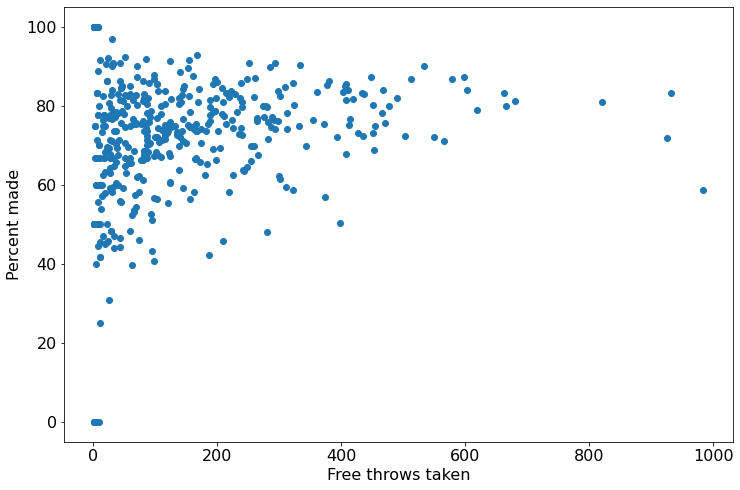

In [160]:
plt.figure(figsize=(12, 8))
shot_count_df_2017 = shot_count_df[shot_count_df['season_start'] == 2007]
plt.scatter(shot_count_df_2017['total'], shot_count_df_2017['%'])
plt.xlabel('Free throws taken')
plt.ylabel('Percent made')

In [161]:
#LeBron James #Kevin Durant #Kobe Bryant #Carmelo Anthony #Dwight Howard

In [162]:
#LeBron = shot_count_df.loc['LeBron James']
LeBron = shot_count_df[shot_count_df['player']=='LeBron James']
LeBron

,player,season_start,made,total,%
2596,LeBron James,2006,639,899,71.078977
2597,LeBron James,2007,664,925,71.783784
2598,LeBron James,2008,745,963,77.362409
2599,LeBron James,2009,681,893,76.259798
2600,LeBron James,2010,631,829,76.115802
2601,LeBron James,2011,560,735,76.190476
2602,LeBron James,2012,538,709,75.881523
2603,LeBron James,2013,568,745,76.241611
2604,LeBron James,2014,497,695,71.510791
2605,LeBron James,2015,434,608,71.381579


(70.0, 90.0)

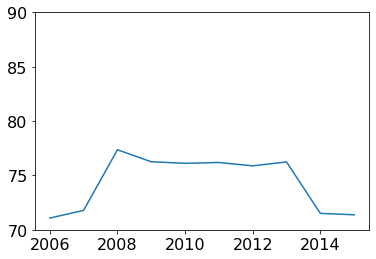

In [163]:
plt.figure()
plt.plot(LeBron['season_start'],LeBron['%'])
plt.ylim(70,90) #figure out ylim very important


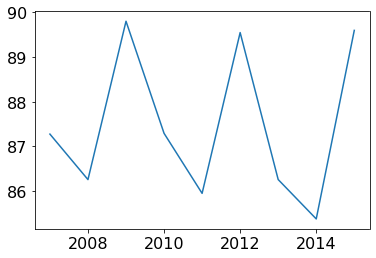

In [164]:
#shot_count_df.loc['Kevin Durant']

Durant = shot_count_df[shot_count_df['player']== 'Kevin Durant']
plt.plot(Durant['season_start'], Durant['%'])

In [165]:
#shot_count_df.loc['Kobe Bryant']
Kobe = shot_count_df[shot_count_df['player']== 'Kobe Bryant']

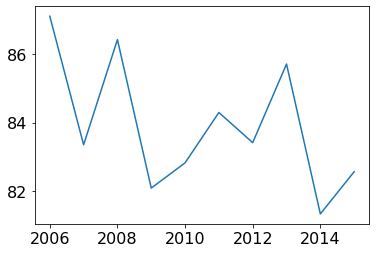

In [166]:
plt.plot(Kobe['season_start'], Kobe['%'])

In [167]:
#shot_count_df.loc['Carmelo Anthony']
Carmelo = shot_count_df[shot_count_df['player']== 'Carmelo Anthony']

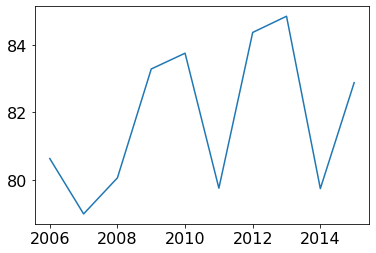

In [168]:
plt.plot(Carmelo['season_start'], Carmelo['%'])

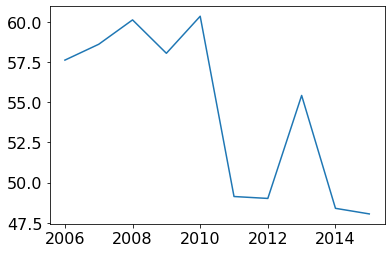

In [169]:
#shot_count_df.loc['Dwight Howard']
Dwight = shot_count_df[shot_count_df['player'] == 'Dwight Howard']
plt.plot(Dwight['season_start'], Dwight['%'])

In [170]:
#Steve Nash #Ray Allen # Chauncey Billups #Stephen Curry #Dirk Nowitzki

In [171]:
Nash = shot_count_df[shot_count_df['player'] == 'Steve Nash']

In [172]:
Ray = shot_count_df[shot_count_df['player'] == 'Ray Allen']

In [173]:
Chauncey = shot_count_df[shot_count_df['player'] == 'Chauncey Billups']

In [174]:
Curry = shot_count_df[shot_count_df['player'] == 'Stephen Curry']

In [175]:
Dirk = shot_count_df[shot_count_df['player'] == 'Dirk Nowitzki']

In [176]:
from matplotlib import rc  #changing font size

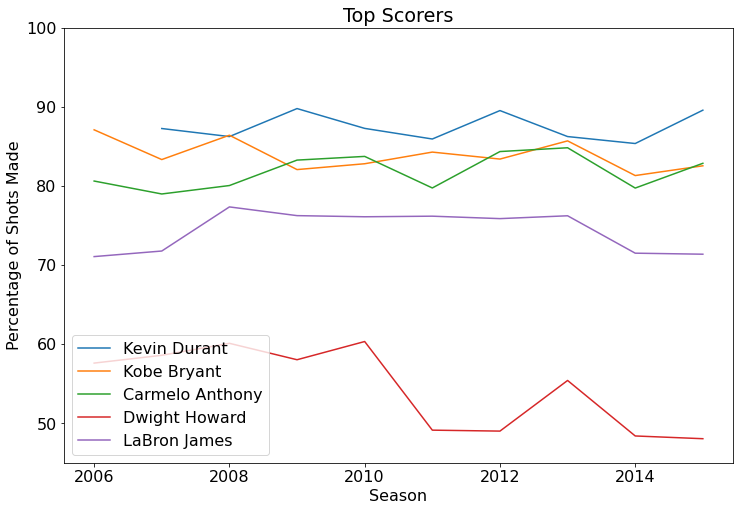

In [186]:
plt.figure(figsize=(12,8))
rc('font', **{'size': 16})
plt.plot(Durant['season_start'], Durant['%'], label='Kevin Durant')
plt.plot(Kobe['season_start'], Kobe['%'], label='Kobe Bryant')
plt.plot(Carmelo['season_start'], Carmelo['%'], label='Carmelo Anthony')
plt.plot(Dwight['season_start'], Dwight['%'], label='Dwight Howard')
plt.plot(LeBron['season_start'],LeBron['%'], label='LaBron James')
plt.xlabel('Season')
plt.ylabel('Percentage of Shots Made')
plt.legend(loc="lower left")
plt.title(label='Top Scorers')
plt.ylim(45,100)
plt.show()

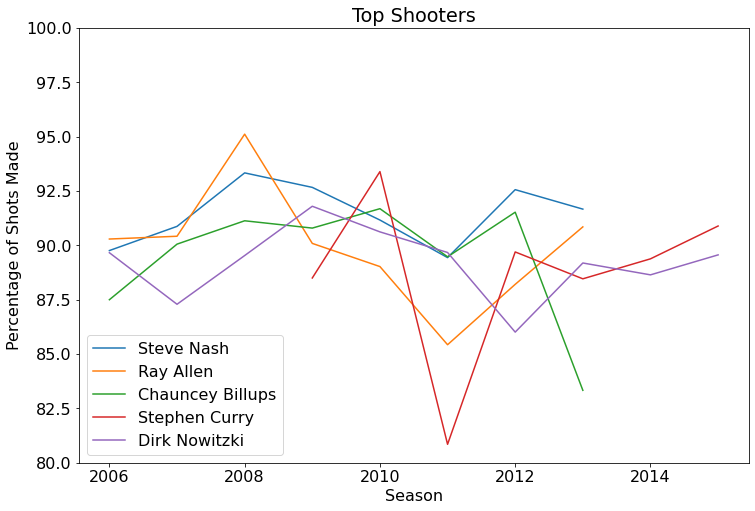

In [187]:
plt.figure(figsize=(12,8))
rc('font', **{'size': 16})
plt.plot(Nash['season_start'], Nash['%'], label='Steve Nash')
plt.plot(Ray['season_start'], Ray['%'], label='Ray Allen')
plt.plot(Chauncey['season_start'], Chauncey['%'], label='Chauncey Billups')
plt.plot(Curry['season_start'], Curry['%'], label='Stephen Curry')
plt.plot(Dirk['season_start'], Dirk['%'], label='Dirk Nowitzki')
plt.xlabel('Season')
plt.ylabel('Percentage of Shots Made')
plt.legend(loc="lower left")
plt.title(label='Top Shooters')
plt.ylim(80,100)
plt.show()

In [179]:
df['game_name'] = df['home_team'] + df['visit_team'] + df['home_final_score'].astype(str) + df['visit_final_score'].astype(str)

In [180]:
df.head()

,player,season_start,period,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,shot_count,team_abbreviation,age,country,draft_year,pts,game_name
0,Aaron Brooks,2007,4,0,1,POR,HOU,83,95,86,95,0.933333,2,HOU,23,USA,2007,5.2,PORHOU8695
1,Aaron Brooks,2007,4,0,1,LAC,HOU,77,96,79,105,12.533333,1,HOU,23,USA,2007,5.2,LACHOU79105
2,Aaron Brooks,2007,3,0,1,HOU,NY,76,67,103,91,4.466667,1,HOU,23,USA,2007,5.2,HOUNY10391
3,Aaron Brooks,2007,4,0,1,POR,HOU,77,86,79,89,7.533333,2,HOU,23,USA,2007,5.2,PORHOU7989
4,Aaron Brooks,2007,2,0,1,HOU,NO,31,35,82,87,26.600000,1,HOU,23,USA,2007,5.2,HOUNO8287


In [181]:
df['season_start'].max()

2015

In [182]:
df['season_start'].min()

2006

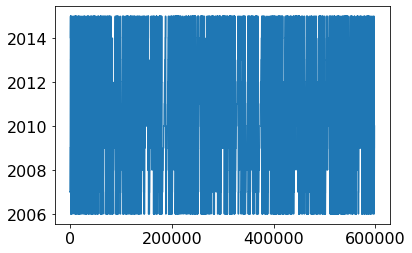

In [183]:
plt.plot(df['season_start'])